In [ ]:
#connect drive
from google.colab import  drive 
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
#unzipping folders
! unzip "drive/MyDrive/dataset.zip" -d data

In [ ]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

In [ ]:
#normalized cross-correlation function
def ncc(A, B):
    # Sum of squares across rows
    ssA = np.sqrt(np.sum(A**2))
    ssB = np.sqrt(np.sum(B**2))

    # Finally get corr coeff
    return np.sum(A*B) / (ssA*ssB)

In [ ]:
#match template function
def match_template(image1, image2):
    # Convert the images to grayscale
    image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    x,y=image1_gray.shape
    x1,y1=image2_gray.shape
    # Normalize the images
    image1_gray = (image1_gray - np.mean(image1_gray)) / np.std(image1_gray)
    image2_gray = (image2_gray - np.mean(image2_gray)) / np.std(image2_gray)
    
    # Create an empty array to store the correlations
    img=np.array(image1_gray,dtype="int")
    target=np.array(image2_gray,dtype="int")
    correlation_array =[]
    maxarr=[0,0]
    maxi=0
    # Loop through each pixel in the first image
    for i in range(x1-x+1):
        for j in range(y1-y+1):
          roi=target[i:i+x,j:j+y]
          current=ncc(roi,img)
          correlation_array.append(current)
          if correlation_array[len(correlation_array)-1]>maxi:
            maxi=correlation_array[-1]
            maxarr=[i,j]
    return maxarr[0],maxarr[1],maxi

In [ ]:
import os
#This function compares the image with 26 template images and returns the most similar target.
def find_target(image):
  peakvalues=[]
  path="data/dataset/template"
  maxi=0
  x=0
  target=0
  for i in os.listdir(path):
    temp=cv2.imread(os.path.join(path,i))
    curr=match_template(temp,image)[2]
    peakvalues.append(curr)
    if curr>maxi:
      maxi=curr
      target=x
    x+=1
  #print(peakvalues)
  return target

In [ ]:
#Here I tried to predict the targets of all the pictures and saved them in the predictions list
targets=[i for i in range(26) for j in range(30)]
predictions=[]
path1="data/dataset/target"
x=1
for i in os.listdir(path1):
  newpath=os.path.join(path1,i)
  for j in os.listdir(newpath):
    img=cv2.imread(os.path.join(newpath,j))
    predictions.append(find_target(img))
    #print(x);x+=1

In [14]:
print(predictions)

[23, 23, 5, 23, 12, 13, 12, 4, 5, 8, 5, 13, 23, 8, 8, 24, 7, 24, 7, 21, 8, 4, 14, 13, 20, 23, 19, 8, 8, 23, 14, 8, 24, 5, 13, 23, 15, 8, 16, 19, 24, 19, 8, 5, 16, 3, 16, 23, 5, 8, 5, 8, 5, 19, 19, 23, 8, 10, 15, 2, 5, 23, 21, 8, 13, 23, 5, 23, 24, 3, 22, 23, 8, 4, 5, 7, 5, 3, 23, 13, 6, 24, 3, 23, 5, 18, 13, 24, 1, 8, 5, 19, 19, 7, 5, 17, 23, 5, 10, 10, 15, 23, 2, 8, 5, 11, 25, 19, 7, 19, 7, 19, 24, 13, 5, 15, 15, 7, 14, 7, 7, 7, 7, 19, 12, 13, 14, 14, 10, 8, 14, 10, 13, 7, 14, 14, 14, 10, 14, 12, 14, 5, 13, 6, 22, 7, 9, 5, 9, 7, 7, 8, 16, 17, 13, 23, 5, 11, 7, 23, 5, 2, 19, 19, 23, 19, 10, 25, 11, 23, 25, 5, 19, 11, 13, 23, 19, 5, 11, 13, 19, 23, 3, 8, 24, 5, 13, 8, 24, 4, 23, 5, 3, 24, 3, 16, 3, 13, 3, 4, 5, 2, 24, 5, 5, 9, 25, 5, 17, 5, 15, 23, 8, 5, 19, 10, 19, 23, 23, 20, 23, 5, 8, 5, 19, 7, 13, 13, 7, 5, 7, 25, 23, 23, 19, 23, 23, 23, 19, 23, 13, 13, 11, 19, 4, 8, 1, 23, 8, 12, 8, 23, 23, 15, 11, 19, 19, 20, 8, 13, 24, 15, 23, 8, 8, 10, 4, 23, 23, 16, 6, 8, 24, 5, 23, 13, 23, 5, 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(targets, predictions)
print('Confusion Matrix\n')
#print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(targets, predictions)))

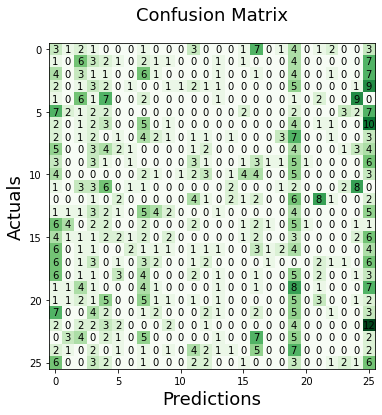

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=confusion, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
def calculate_accuracy(targets,pred):
  correct=0
  falses=0
  for i in range(780):
    if(pred[i]==targets[i]):
      correct+=1
    else:
      falses+=1
  return (correct/780)*100

In [ ]:
result=calculate_accuracy(targets,predictions)
result

5.384615384615385

In [ ]:
#%5.4 accuracy

In [69]:
for i in range(360,780):
  if targets[i]==predictions[i]:
    print(i)
    break

415


In [86]:
temp=cv2.imread("data/dataset/template/A.png")
#img1=cv2.cvtColor(temp,cv2.COLOR_RGB2GRAY)
target=cv2.imread("data/dataset/target/A/A1.jpg")
#img2=cv2.cvtColor(target,cv2.COLOR_RGB2GRAY)

(145, 186, 3)


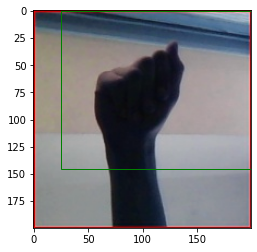

In [88]:
x,y,maksi=match_template(temp,target)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Create figure and axes
fig, ax = plt.subplots()
temp2=cv2.imread("data/dataset/template/W.png")
# Display the image
ax.imshow(target)
print(temp.shape)
# Create a Rectangle patch
rect = patches.Rectangle((x, y), temp.shape[1],temp.shape[0], linewidth=1, edgecolor='g', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
#plt.savefig("target5.jpg")
plt.show()

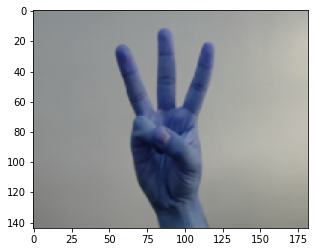

In [90]:
plt.imshow(temp2)

(146, 186, 3)


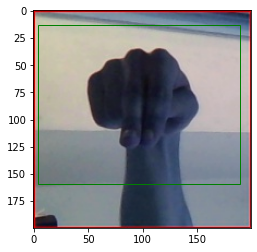

In [75]:
temp=cv2.imread("data/dataset/template/N.png")
target=cv2.imread("data/dataset/target/N/N401.jpg")
x,y,maksi=match_template(temp,target)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Create figure and axes
fig, ax = plt.subplots()
#temp2=cv2.imread("data/dataset/template/W.png")
# Display the image
ax.imshow(target)
print(temp.shape)
# Create a Rectangle patch
rect = patches.Rectangle((x, y), temp.shape[1],temp.shape[0], linewidth=1, edgecolor='g', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
#plt.savefig("target5.jpg")
plt.show()

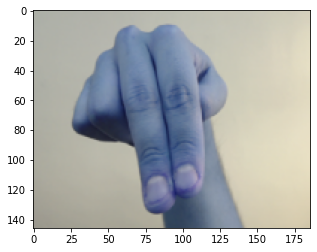

In [76]:
plt.imshow(temp)

(147, 182, 3)


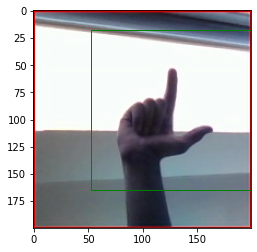

In [77]:
temp=cv2.imread("data/dataset/template/L.png")
target=cv2.imread("data/dataset/target/L/L2901.jpg")
x,y,maksi=match_template(temp,target)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Create figure and axes
fig, ax = plt.subplots()
#temp2=cv2.imread("data/dataset/template/W.png")
# Display the image
ax.imshow(target)
print(temp.shape)
# Create a Rectangle patch
rect = patches.Rectangle((x, y), temp.shape[1],temp.shape[0], linewidth=1, edgecolor='g', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
#plt.savefig("target5.jpg")
plt.show()

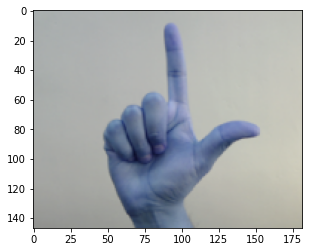

In [78]:
plt.imshow(temp)

(144, 185, 3)


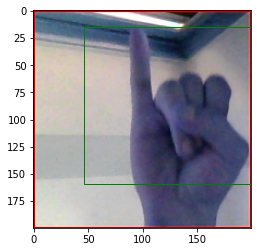

In [81]:
temp=cv2.imread("data/dataset/template/I.png")
target=cv2.imread("data/dataset/target/I/I1201.jpg")
x,y,maksi=match_template(temp,target)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Create figure and axes
fig, ax = plt.subplots()
#temp2=cv2.imread("data/dataset/template/W.png")
# Display the image
ax.imshow(target)
print(temp.shape)
# Create a Rectangle patch
rect = patches.Rectangle((x, y), temp.shape[1],temp.shape[0], linewidth=1, edgecolor='g', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
#plt.savefig("target5.jpg")
plt.show()

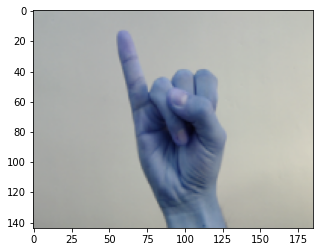

In [82]:
plt.imshow(temp)

(146, 185, 3)


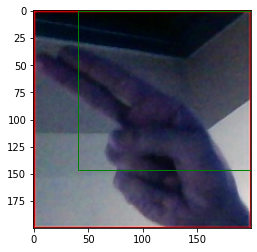

In [83]:
temp=cv2.imread("data/dataset/template/H.png")
target=cv2.imread("data/dataset/target/H/H2101.jpg")
x,y,maksi=match_template(temp,target)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Create figure and axes
fig, ax = plt.subplots()
#temp2=cv2.imread("data/dataset/template/W.png")
# Display the image
ax.imshow(target)
print(temp.shape)
# Create a Rectangle patch
rect = patches.Rectangle((x, y), temp.shape[1],temp.shape[0], linewidth=1, edgecolor='g', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
#plt.savefig("target5.jpg")
plt.show()

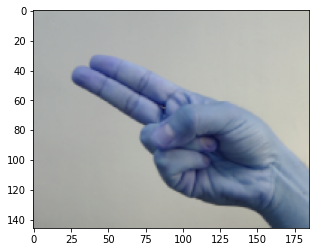

In [84]:
plt.imshow(temp)

In [ ]:
"""
you must convert the target and template images to binary images and compute HOGs (histogram
of oriented gradients) of the target and template images and make comparisons by using these HOGs.
"""

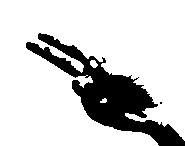

In [95]:
from google.colab.patches import cv2_imshow
imagetemp=cv2.imread("data/dataset/template/H.png")
gray_imaget = cv2.cvtColor(imagetemp, cv2.COLOR_BGR2GRAY)
imagetar=cv2.imread("data/dataset/target/H/H2101.jpg")
gray_image = cv2.cvtColor(imagetar, cv2.COLOR_BGR2GRAY)
(thresh, binary_imaget) = cv2.threshold(gray_imaget, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
(thresh, binary_image) = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(binary_imaget)

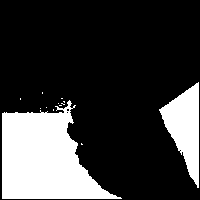

In [96]:
cv2_imshow(binary_image)

In [99]:
binary_imaget=cv2.resize(binary_imaget,(32,32))
binary_image=cv2.resize(binary_image,(32,32))
print(binary_image.shape)

(32, 32)


In [109]:
# Yatay yönde filtrele
filtered_imaget = cv2.Sobel(binary_imaget, cv2.CV_64F, 1, 0, ksize=3)
filtered_image = cv2.Sobel(binary_image, cv2.CV_64F, 1, 0, ksize=3)
arr1 = np.uint8(filtered_imaget)

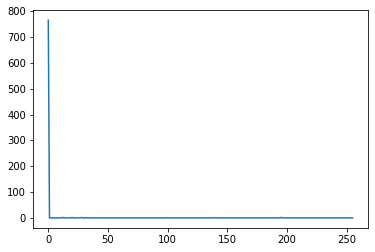

In [111]:
filtered_imaget.astype('int8')
histr = cv2.calcHist([binary_image],[0],None,[256],[0,255])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

(array([760.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

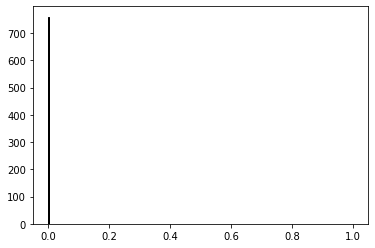

In [107]:
plt.hist(filtered_imaget.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') #calculating histogram